# Finite differences -- example
## CFD
### Kelsey Malloy

<br>purpose: visualize error reduction with increasing # of grid cells and increasing order
<br>
<br>output: frozen plots of function, error assoc. with function, convergence rate

### <i>last edited: 08/2020</i>

In [1]:
import numpy as np
import tarfile
import os
import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy.ndimage import gaussian_filter
#from sklearn.datasets.samples_generator import make_blobs
import scipy.stats as sps

In [23]:
def func(x):
    result = np.sin(x*np.pi)
    return result

def dfunc(x):
    result = np.pi * np.cos(x*np.pi)
    return result

In [12]:
def fill_func(xpts):
    func_values=[]
    for x in xpts:
        func_value = func(x)
        func_values.append(func_value)
    return np.array(func_values)

def fill_dfunc(xpts):
    deriv_exacts = [] 
    for x in xpts:
        deriv_exact = dfunc(x)
        deriv_exacts.append(deriv_exact)
    return np.array(deriv_exacts)

In [48]:
def cd(func_values,dx,order,periodic):
    N = len(func_values)
    #print(N)
    deriv_estimate=np.empty((N),dtype=np.longdouble)
    
    # NOTE: python does NOT include the endpt when slicing
    
    if order == 2: # 2nd order centered difference
        deriv_estimate[1:-1] = (func_values[2:]-func_values[:-2]) / (2*dx)                           
        if periodic==1: # handling edges
            deriv_estimate[0] = (func_values[1]-func_values[-2]) / (2*dx) 
            deriv_estimate[-1] = (func_values[1]-func_values[-2]) / (2*dx)

    elif order == 4: # 4th order centered difference
        deriv_estimate[2:-2] = (8*(func_values[3:-1]-func_values[1:-3]) - (func_values[4:]-func_values[:-4])) / (12*dx)
        if periodic==1: # handling edges
            deriv_estimate[1] = (8*(func_values[2]-func_values[0]) - (func_values[3]-func_values[-2])) / (12*dx)
            deriv_estimate[0] = (8*(func_values[1]-func_values[-2]) - (func_values[2]-func_values[-3])) / (12*dx)
            deriv_estimate[-2] = (8*(func_values[-1]-func_values[-3]) - (func_values[1]-func_values[-4])) / (12*dx)
            deriv_estimate[-1] = (8*(func_values[1]-func_values[-2]) - (func_values[2]-func_values[-3])) / (12*dx)
    
    #if order == 6: # 6th order centered difference     
        
    else:
        print('Please check order for centered difference (should be 2 or 4)')
        
    return np.array(deriv_estimate)

In [10]:
# setting up the grid
xmin,xmax=-1,1
nx=[]
start=8
while len(nx) < 9:
    nx.append(start)
    start=start*2
print(nx)

nx=np.array(nx)
dxx = (xmax-xmin) / nx
print(dxx)

[8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[0.25       0.125      0.0625     0.03125    0.015625   0.0078125
 0.00390625 0.00195312 0.00097656]


order: 2
# pts, spacing: 8, 0.25
RMS for dx=0.25: 0.17506485267599184
# pts, spacing: 16, 0.125
RMS for dx=0.125: 0.03004694800090306
# pts, spacing: 32, 0.0625
RMS for dx=0.0625: 0.005191892255189919
# pts, spacing: 64, 0.03125
RMS for dx=0.03125: 0.0009055159563990411
# pts, spacing: 128, 0.015625
RMS for dx=0.015625: 0.00015891423469227683
# pts, spacing: 256, 0.0078125
RMS for dx=0.0078125: 2.798660595686961e-05
# pts, spacing: 512, 0.00390625
RMS for dx=0.00390625: 4.93789400427985e-06
# pts, spacing: 1024, 0.001953125
RMS for dx=0.001953125: 8.720599662957651e-07
# pts, spacing: 2048, 0.0009765625
RMS for dx=0.0009765625: 1.5408495152641028e-07
order: 4
# pts, spacing: 8, 0.25
RMS for dx=0.25: 0.020696572231226902
# pts, spacing: 16, 0.125
RMS for dx=0.125: 0.000916906229087021
# pts, spacing: 32, 0.0625
RMS for dx=0.0625: 3.992632163295618e-05
# pts, spacing: 64, 0.03125
RMS for dx=0.03125: 1.7443629967256574e-06
# pts, spacing: 128, 0.015625
RMS for dx=0.015625: 7.6570298087777

<Figure size 1080x864 with 0 Axes>

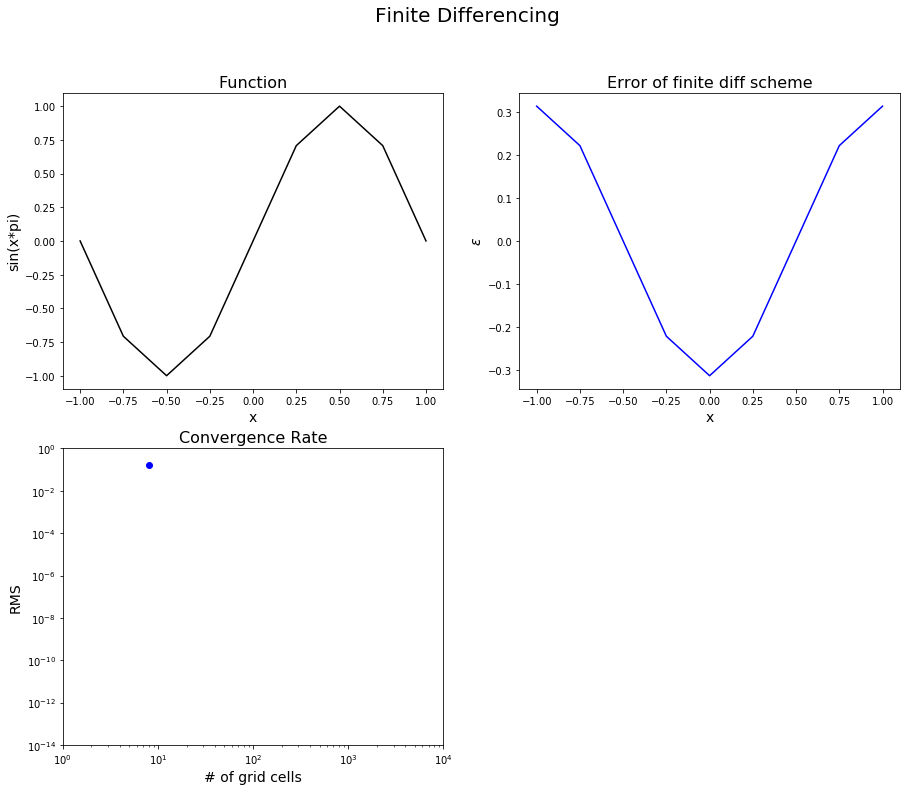

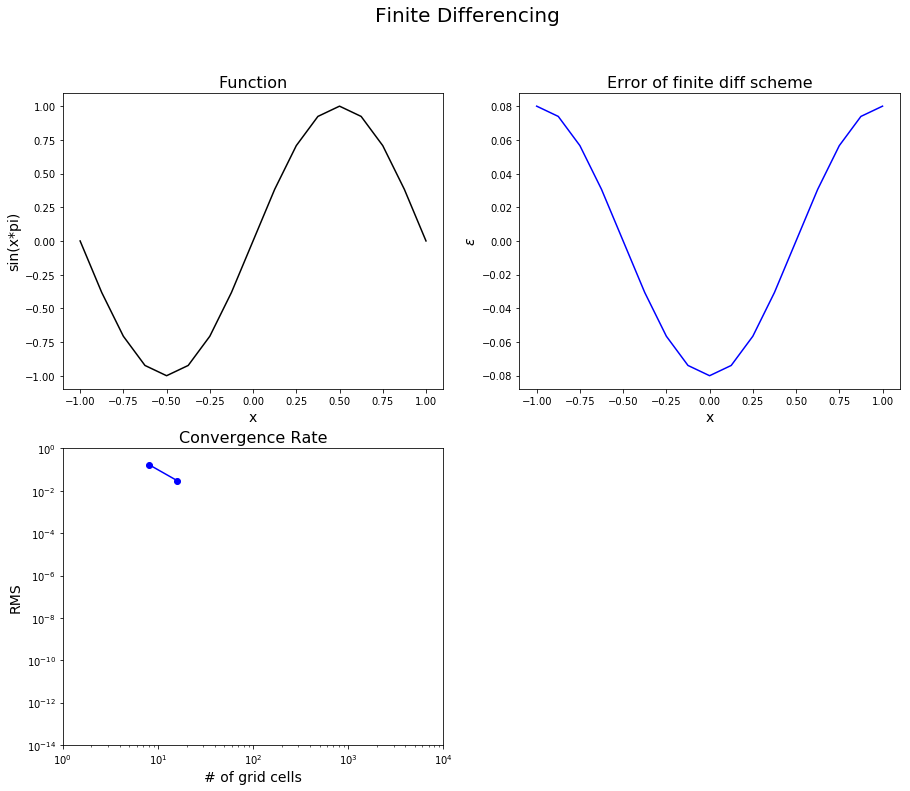

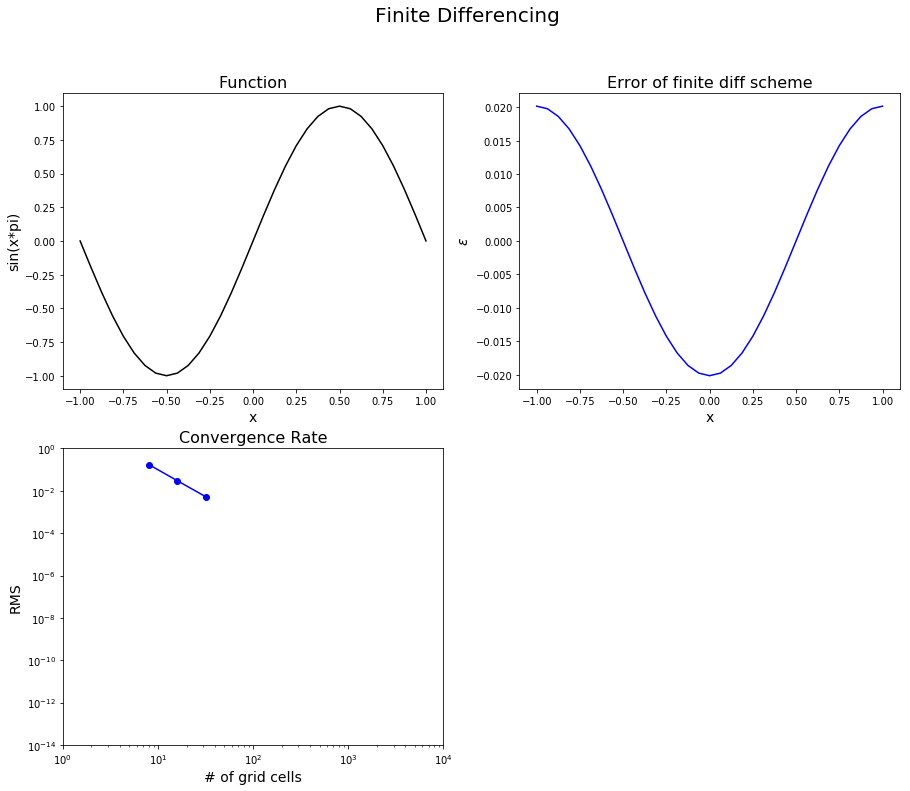

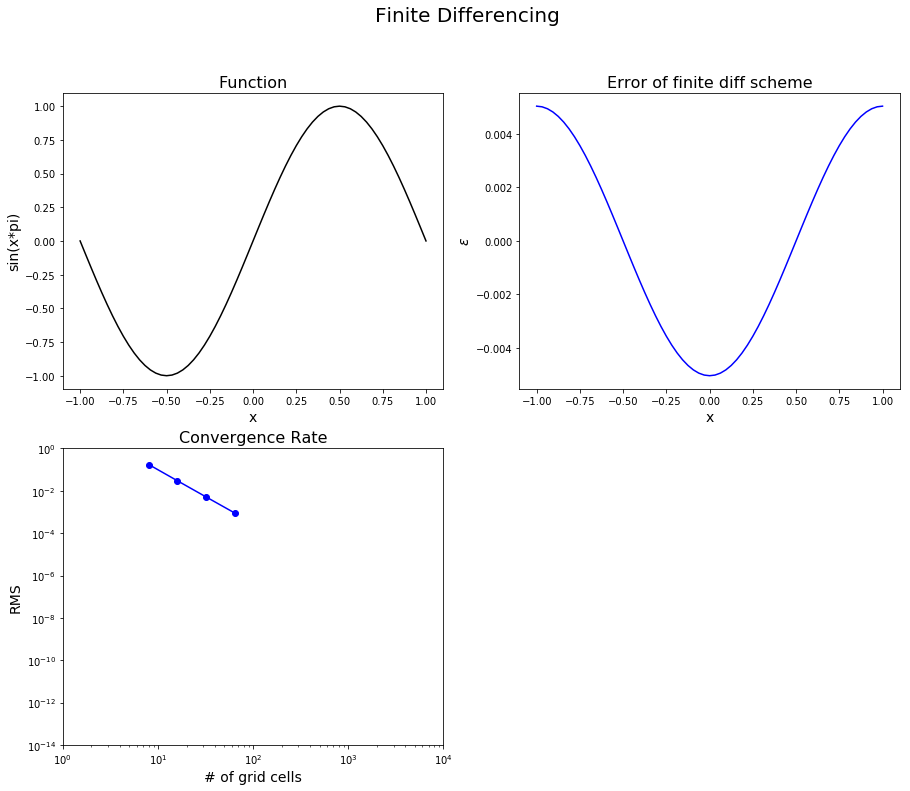

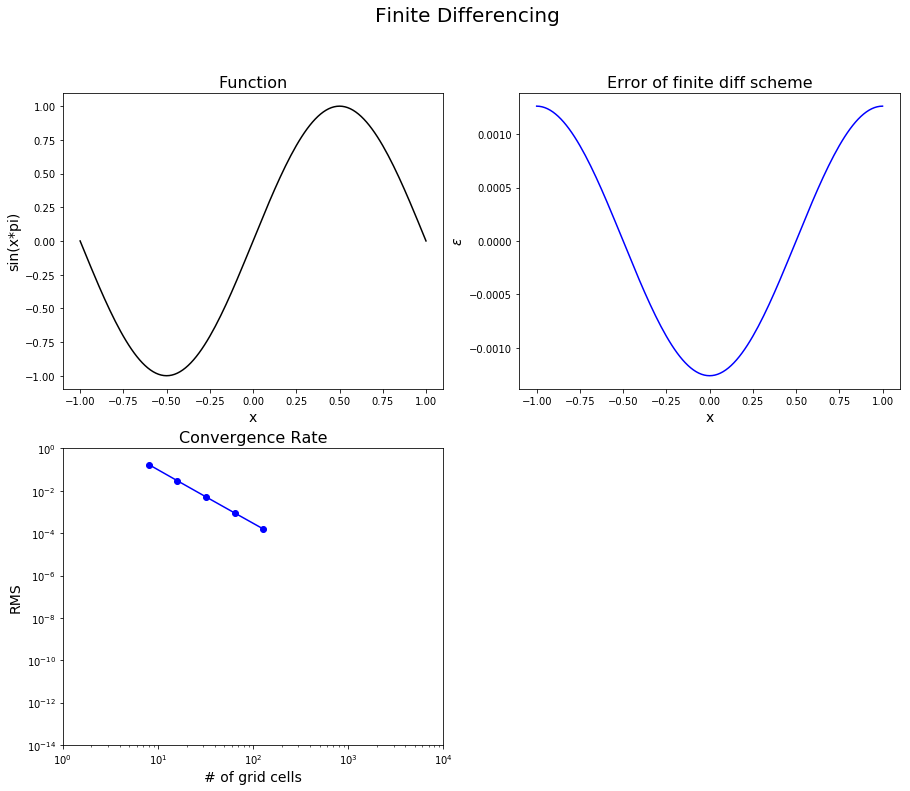

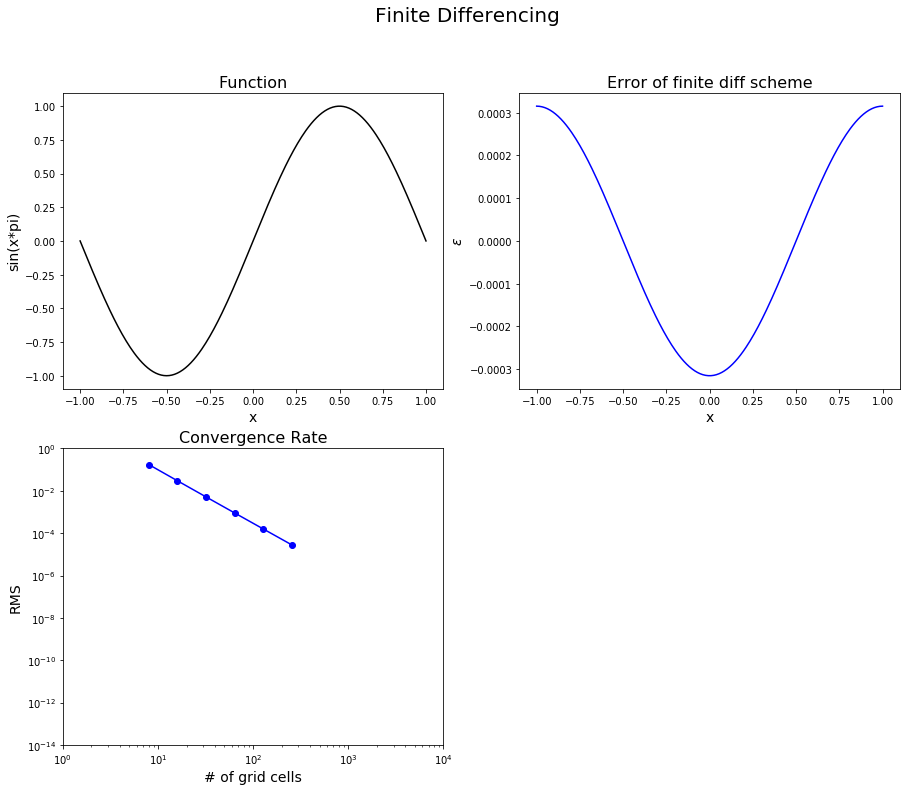

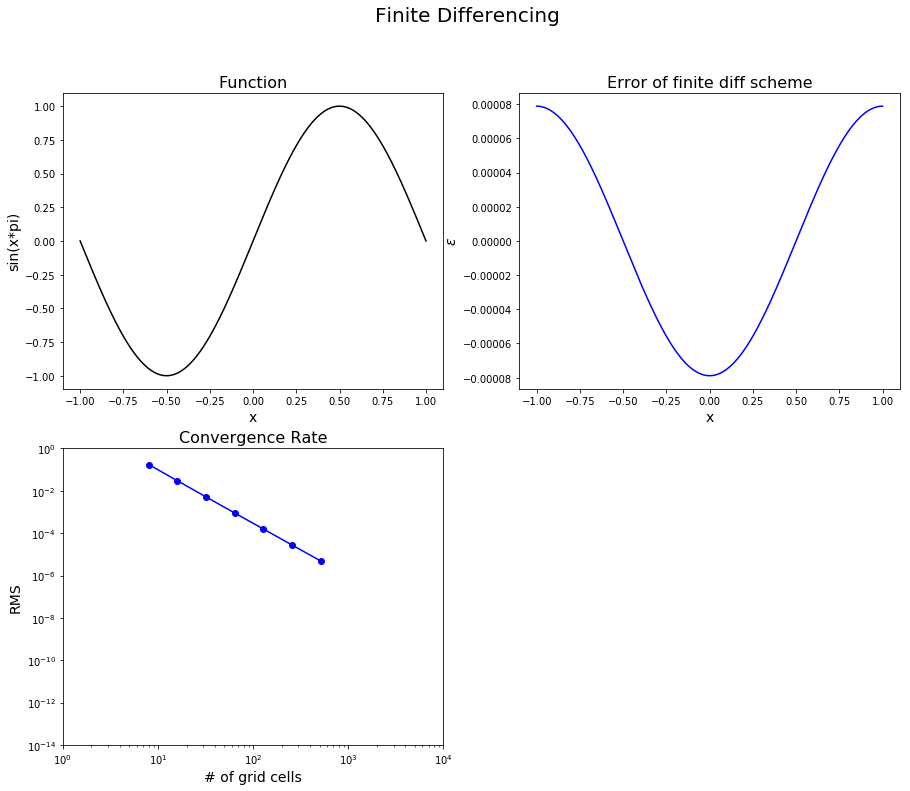

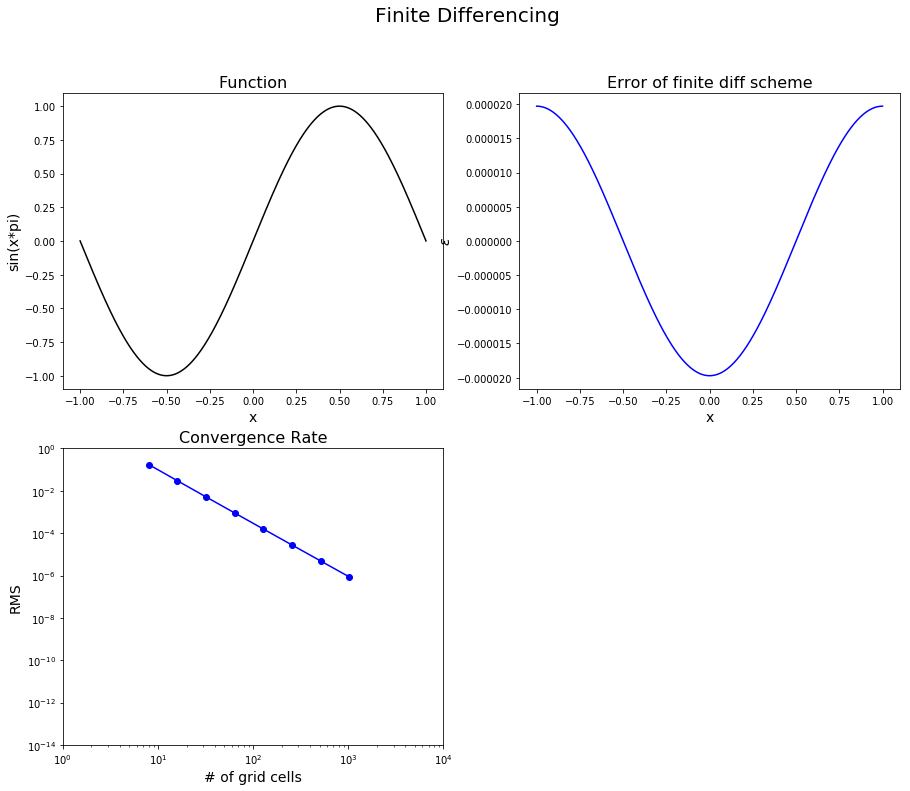

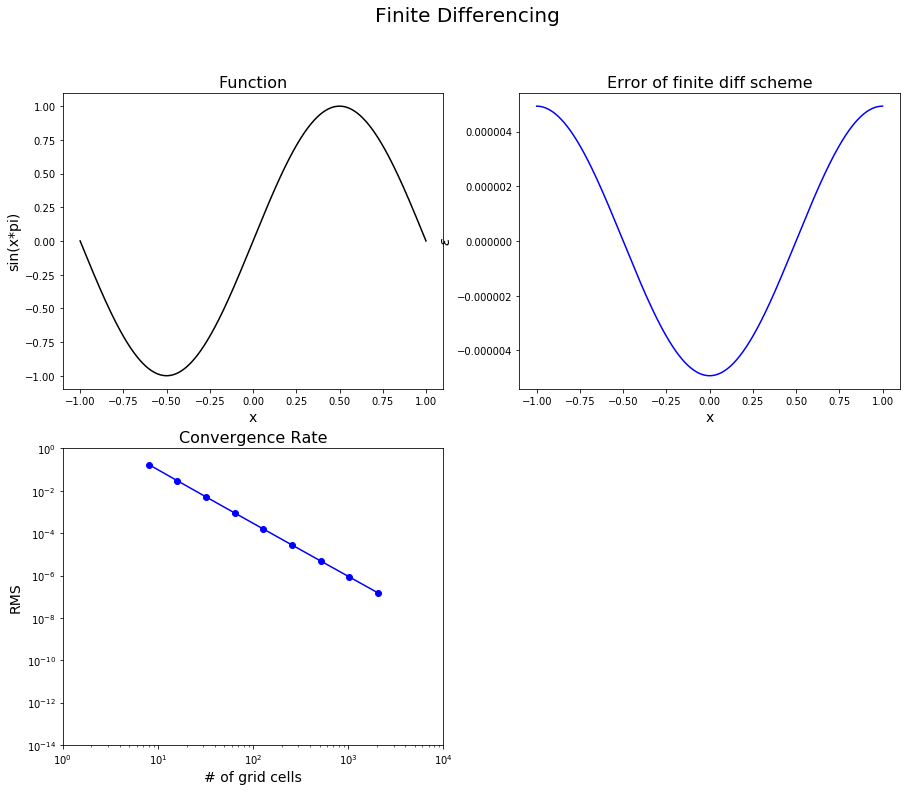

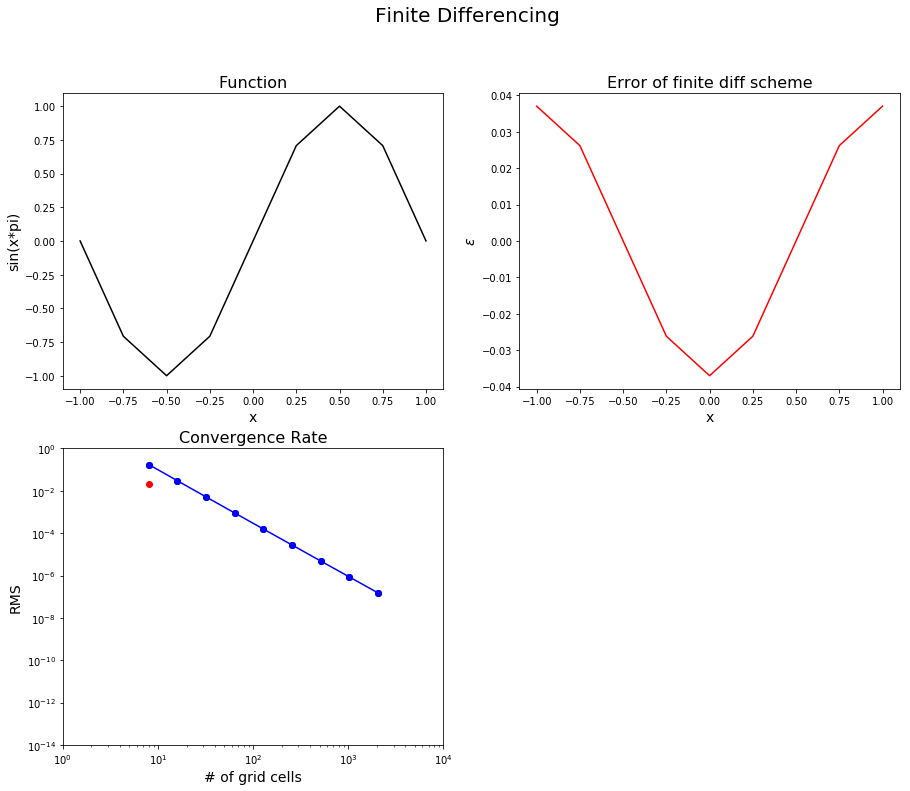

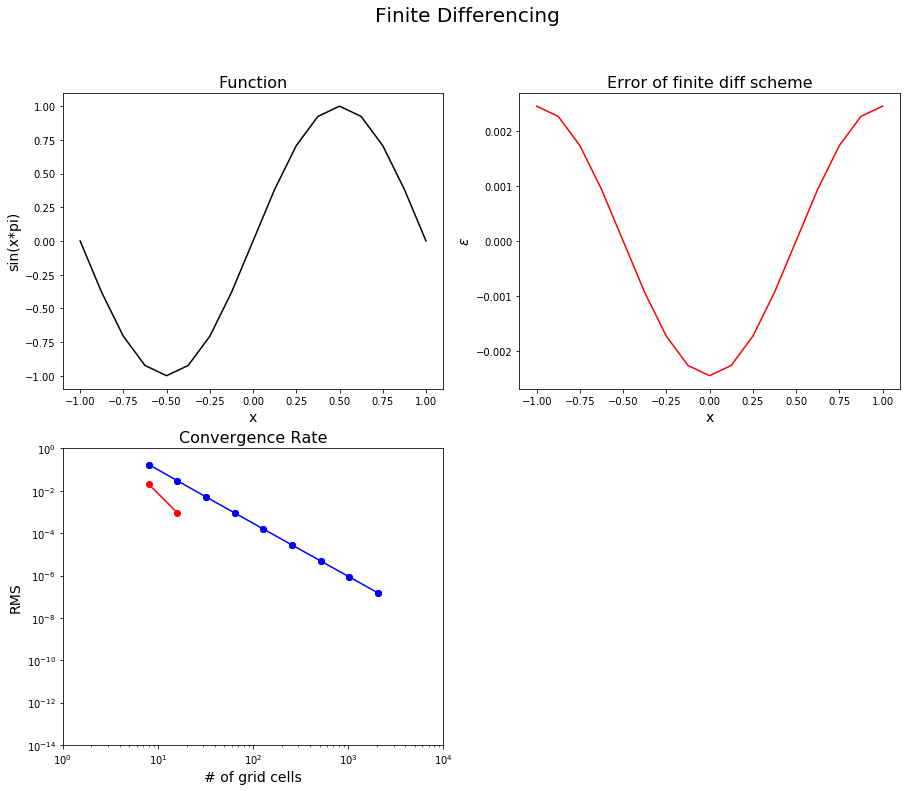

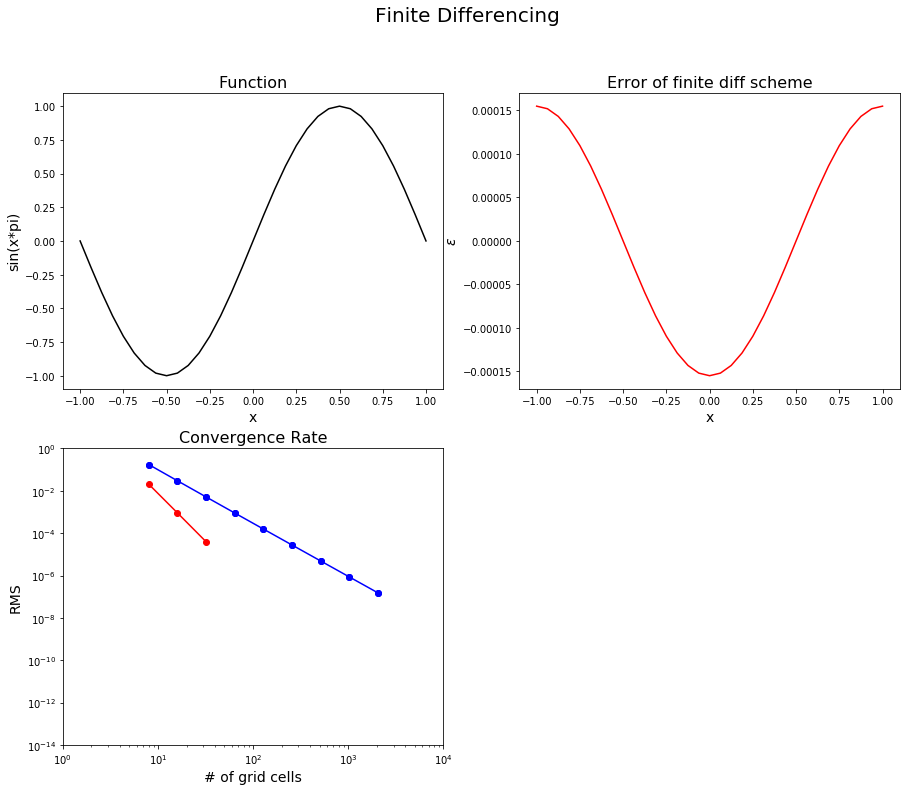

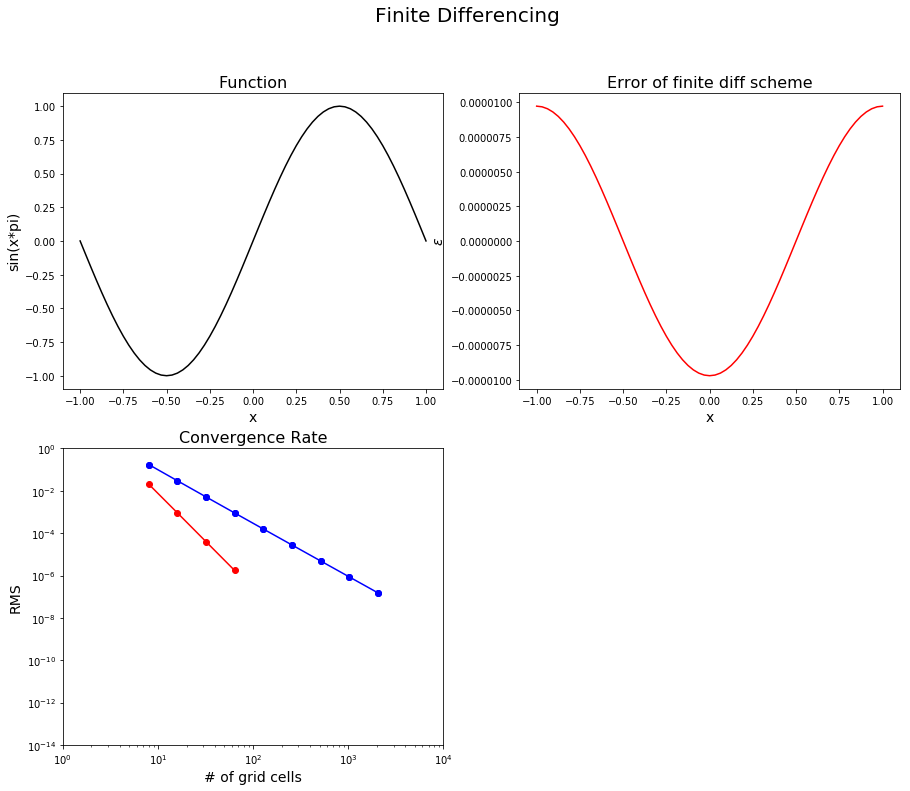

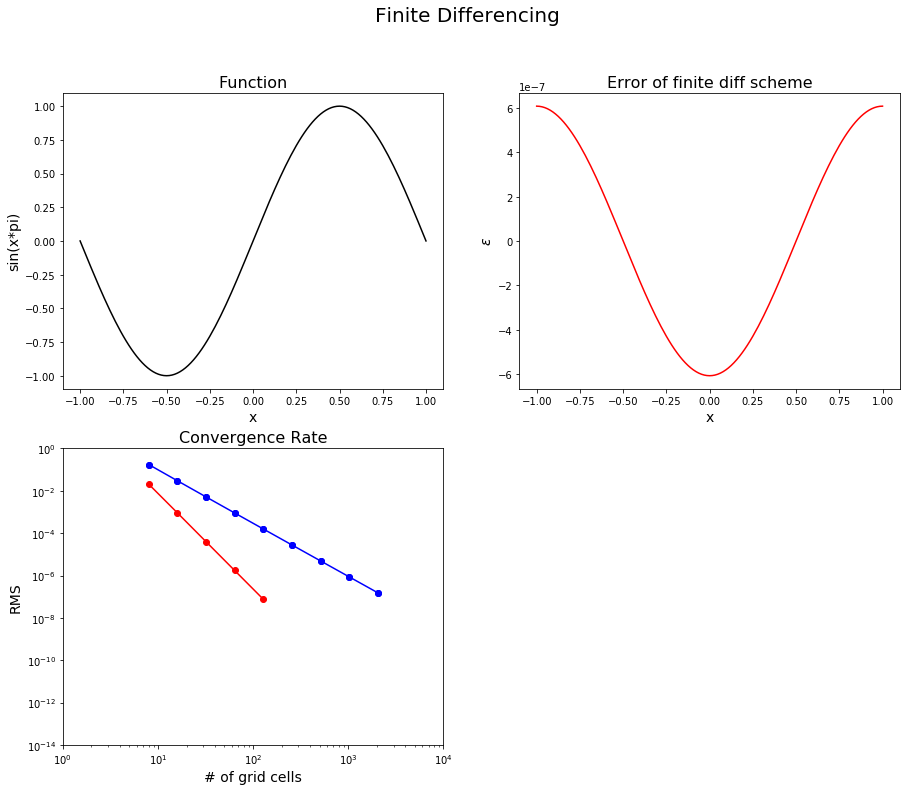

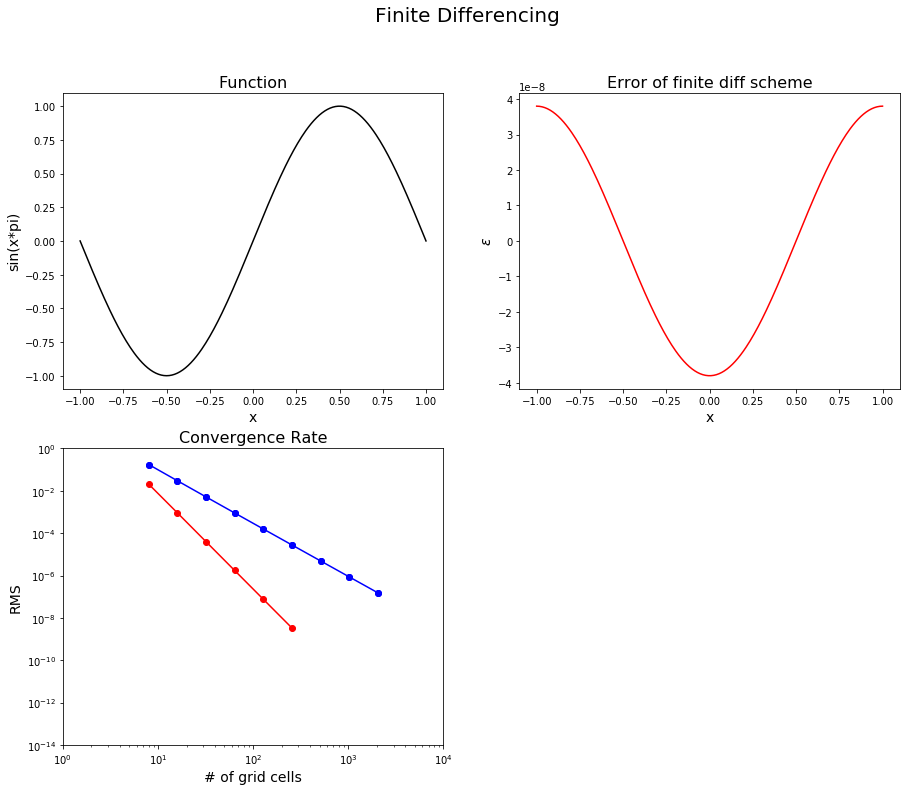

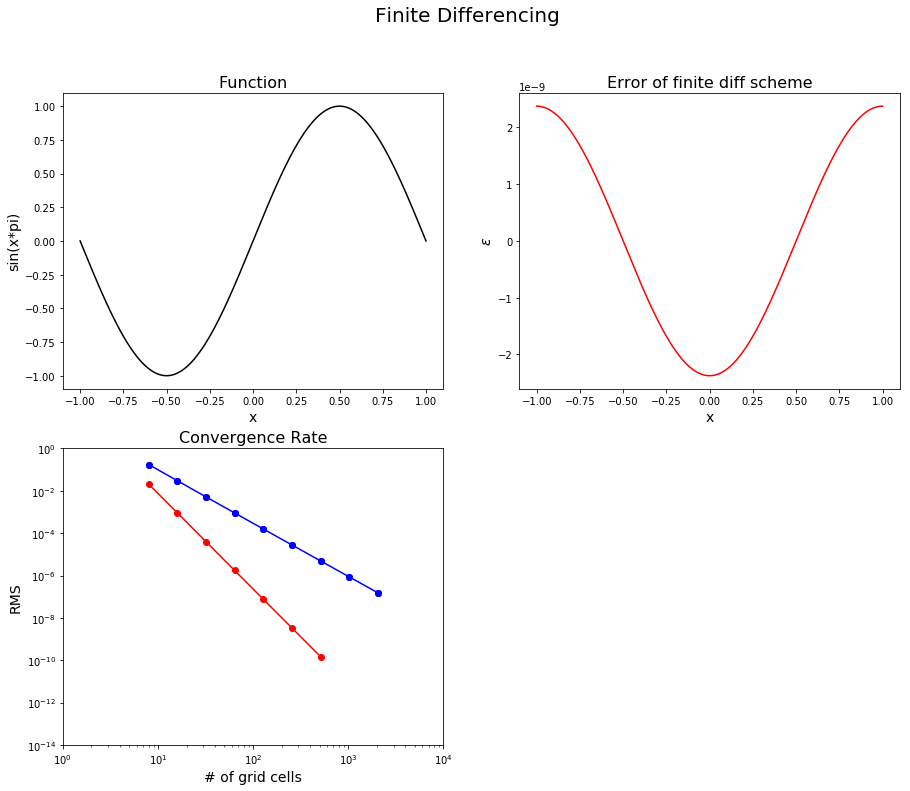

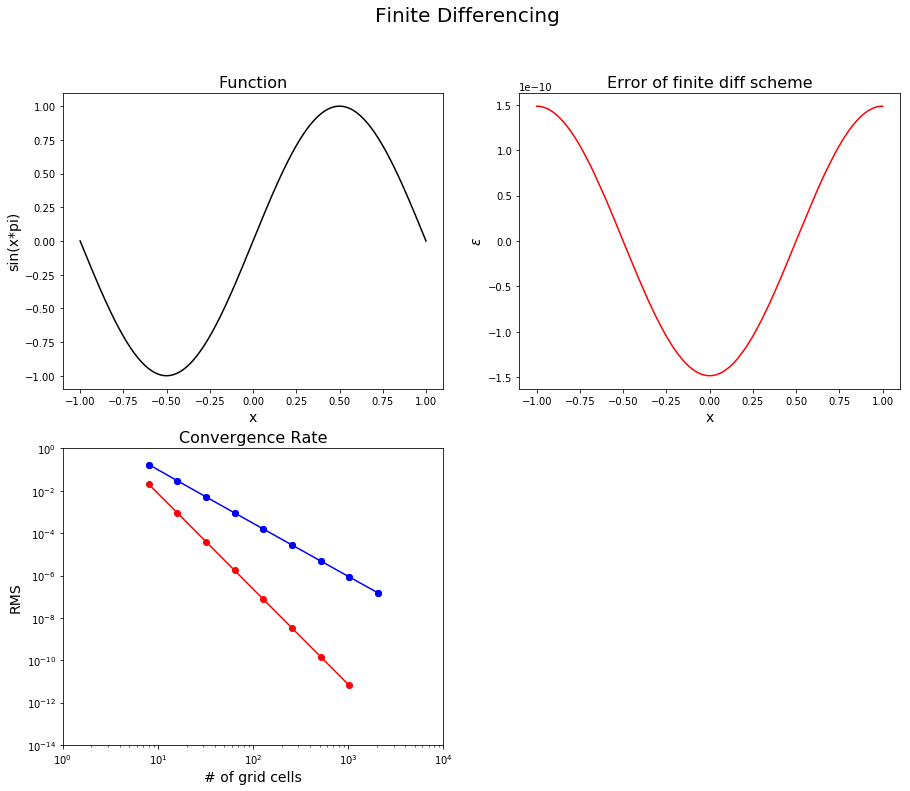

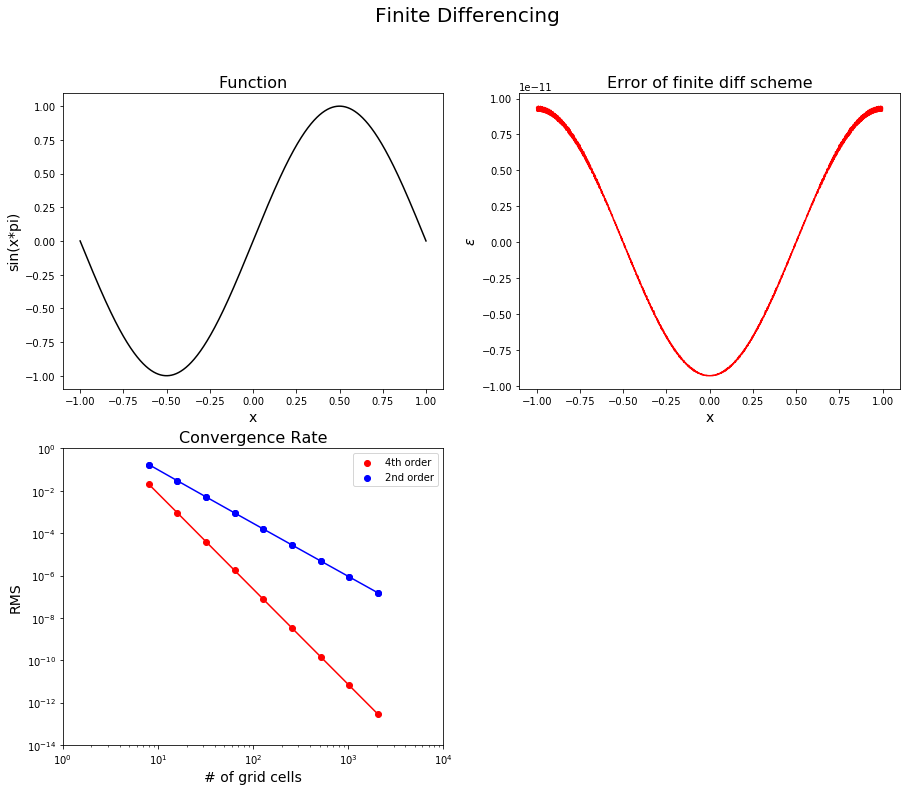

In [58]:
#RMSarchive,NXarchive=[],[]#np.empty((len(nx)),dtype=np.double)
orders=[2,4]

# PLOTTING
fig = plt.figure(figsize=[15,12])
st = fig.suptitle('Finite Differencing',fontsize=20)

for order in orders:
    print('order: '+str(order))
    
    RMS,NX=[],[]
    for i,iteration in enumerate(nx):
        num_pts = iteration # number of grid cells
        dx = dxx[i] # grid cell spacing
        print('# pts, spacing: '+str(num_pts)+', '+str(dx))   
        xpts = np.arange(xmin,xmax+dx,dx) # cell edges included

        periodic=1

        # fill in values of function
        func_values = fill_func(xpts)

        # compute exact derivative
        deriv_exacts = fill_dfunc(xpts)
    

        # compute derivative estimate using centered diff scheme
        deriv_estimates = cd(func_values,dx,order,periodic)

        # compute RMS error between exact deriv & estimate from centered diff
        error = (deriv_estimates-deriv_exacts)    
        RMS.append(np.sqrt(np.sum(error**2))*dx)
        NX.append(nx[i])
        print('RMS for dx='+str(dx)+': '+str(RMS[i]))
        
        if order==2 and i==(len(nx)-1): # save the 2nd order line to plot with 4th order
            RMSarchive=RMS
            NXarchive=NX
    
        # PLOTTING
        fig = plt.figure(figsize=[15,12])
        st = fig.suptitle('Finite Differencing',fontsize=20)

        ax1 = fig.add_subplot(2,2,1)
        ax1.plot(xpts,func_values,'k')
        ax1.set_xlabel('x',fontsize=14)
        ax1.set_ylabel('sin(x*pi)',fontsize=14)
        ax1.set_title('Function',fontsize=16)

        ax2 = fig.add_subplot(2,2,2)
        if order==2:
            ax2.plot(xpts,error,'b')
        else:
            ax2.plot(xpts,error,'r')
        ax2.set_xlabel('x',fontsize=14)
        ax2.set_ylabel('$\epsilon$',fontsize=14)
        ax2.set_title('Error of finite diff scheme',fontsize=16)

        ax3 = fig.add_subplot(2,2,3)
        if order==2:
            ax3.scatter(NX, RMS,c='b',marker='o')
            if i>0:
                ax3.plot(NX, RMS,c='b')
        else:
            ax3.scatter(NX, RMS,c='r',marker='o',label='4th order')
            ax3.scatter(NXarchive, RMSarchive,c='b',marker='o',label='2nd order')
            ax3.plot(NXarchive, RMSarchive,c='b',marker='o')
            if i>0:
                ax3.plot(NX, RMS,c='r')
        ax3.set_xlabel('# of grid cells',fontsize=14)
        ax3.set_ylabel('RMS',fontsize=14)
        ax3.set_yscale('log')
        ax3.set_xscale('log')
        ax3.set_ylim([10**-14,10**0])
        ax3.set_xlim([10**0,10**4])
        ax3.set_title('Convergence Rate',fontsize=16)

        #plt.show()
    
    #plt.savefig('FinDiffEx_order'+str(order)+'.png')
ax3.legend(loc=0)
plt.savefig('FinDiffEx.png')